In [20]:
G = 1
M = 10
L = 2
    
def rhs(r):
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    # calculate radius of orbit squared
    rsq = x**2 + y**2
    # calculate first-order derivatives
    fx = vx
    fy = vy
    fvx = -G*M*x/rsq/np.sqrt(rsq + L**2/4)
    fvy = -G*M*y/rsq/np.sqrt(rsq + L**2/4)
    fr = np.array([fx, fy, fvx, fvy])
    return fr

The time taken by original RK4 is 1.262 seconds.
The time taken by adaptive RK4 is 0.262 seconds.


Text(0.5, 1.0, 'Step size vs. time for adaptive RK4')

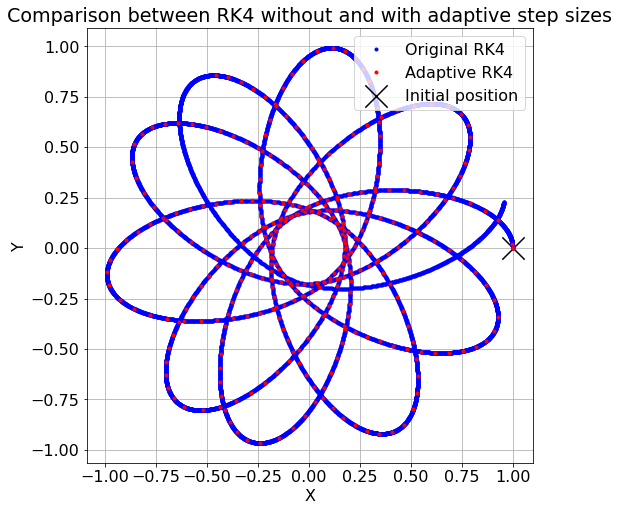

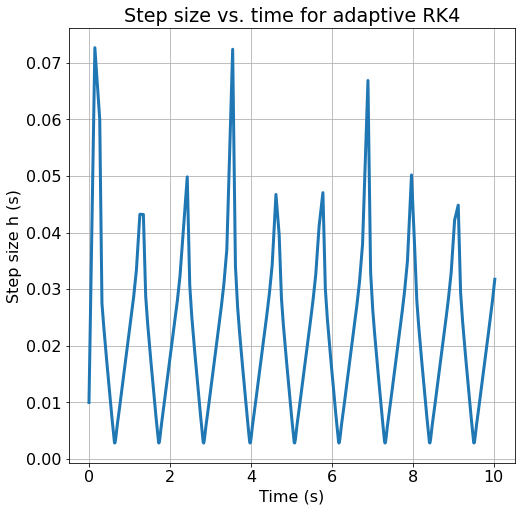

In [21]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 21 03:23:06 2020
@author: Zirui Wan
"""

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
from time import time


###############################################################################
###########################  Part (a) and (b) #################################
###############################################################################

###############################################################################
#####################  Code from Lab 06 #######################################
###############################################################################


# Get initial time.
start = time()
# define step size
h = 0.001
# define array for time points
tpoints = np.arange(0, 10, h)
# initial positions and velocities
vx0 = 0
vy0 = 1
x0 = 1
y0 = 0
# arrays for positions and velocities
xpoints = [x0]
ypoints = [y0]

# array for current state of the system (x, y, vx, vy)
r = np.array([x0, y0, vx0, vy0], float)

# iterate over time points to perform the RK4 calculations
for t in tpoints:
    k1 = h*rhs(r)
    k2 = h*rhs(r+0.5*k1)
    k3 = h*rhs(r+0.5*k2)
    k4 = h*rhs(r+k3)
    r += (k1+2*k2+2*k3+k4)/6
    
    # save positions
    xpoints.append(r[0])
    ypoints.append(r[1])

# Get running time.
end = time()
dtime = end - start
# Output running time.
print('The time taken by original RK4 is %.3f seconds.'%dtime)
 
# visualize the orbit
plt.figure(figsize=(8, 8))
plt.plot(xpoints, ypoints, 'b.', lw=1, label='Original RK4')
plt.scatter(x0, y0, c='k', marker='x', s=500, label='Initial position')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparison between RK4 without and with adaptive step sizes')



# Get initial time.
start = time()
# define step size
h = 0.01
# define array for time points
tpoints = np.arange(0, 10, h)
t = 0
delta = 1e-6
# initial positions and velocities
vx0 = 0
vy0 = 1
x0 = 1
y0 = 0
# arrays for positions and velocities
xpoints = [x0]
ypoints = [y0]
tpoints = [t]
stepsize = [h]

# array for current state of the system (x, y, vx, vy)
r = np.array([x0, y0, vx0, vy0], float)

# iterate over time points to perform the RK4 calculations
while t < 10:
    # Result from the double step size.
    k1 = 2*h*rhs(r)
    k2 = 2*h*rhs(r + 0.5*k1)
    k3 = 2*h*rhs(r + 0.5*k2)
    k4 = 2*h*rhs(r + k3)
    r2 = r + (k1+2*k2+2*k3+k4)/6
    # Result from two steps with single size.
    k1 = h*rhs(r)
    k2 = h*rhs(r + 0.5*k1)
    k3 = h*rhs(r + 0.5*k2)
    k4 = h*rhs(r + k3)
    r1 = r + (k1+2*k2+2*k3+k4)/6
    k1 = h*rhs(r1)
    k2 = h*rhs(r1 + 0.5*k1)
    k3 = h*rhs(r1 + 0.5*k2)
    k4 = h*rhs(r1 + k3)
    r1 = r1 + (k1+2*k2+2*k3+k4)/6
    # Calculate the errors on x and y directions.
    ex = (r2[0] - r1[0])/30.
    ey = (r2[1] - r1[1])/30.
    # Calculate the rho constant.
    rho = h*delta/np.sqrt(ex**2 + ey**2)
    # Calculate the new step size.
    h *= rho**0.25
    # Check if this rho is good. If it is good, append data, if not,
    # restart the error estimate with new step size.
    if rho >= 1:
        xpoints.append(r[0])
        ypoints.append(r[1])
        stepsize.append(h)
        r = np.copy(r1)
        t += 2*h
        tpoints.append(t)


# Get running time.
end = time()
dtime = end - start
# Output running time.
print('The time taken by adaptive RK4 is %.3f seconds.'%dtime)

# visualize the orbit
plt.plot(xpoints, ypoints, 'r.', lw=30, label='Adaptive RK4')
plt.legend()


###############################################################################
###########################  Part (c) #########################################
###############################################################################

plt.figure(figsize=(8, 8))
plt.plot(tpoints, stepsize, lw=3)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Step size h (s)')
plt.title('Step size vs. time for adaptive RK4')